# __AIRLINE PASSENGER SATISFACTION__

__DATASET__ : US Airline passenger satisfaction, it was taken from [Kaggle](https://www.kaggle.com/johndddddd/customer-satisfaction).

This data shows whether a passenger is satisfied with the airlines or not after travelling with them. There are several other measurement or to say feedback taken from the customers as well as their demographic data is also recorded. The dataset consists of the details of customers who have already flown with them.

__GOALS:__
1. Predicts whether the future passengers would be satisfied or neutral/dissatisfied with service.
2. To know on which airline aspect of the services offered by them have to be emphasized more to generate more satisfied passengers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings("ignore")

### __DATA UNDERSTANDING__

In [2]:
pd.options.display.max_columns = None

satis = pd.read_csv('satisfaction.csv')
satis.rename({'satisfaction_v2' : 'Satisfaction'}, axis = 1, inplace = True)

satis.head()

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [3]:
satis.shape

(129880, 24)

Dataset has 129980 rows and 24 columns which are:
- ID: Passengers number
- Satisfaction: Airline passengers satisfaction level(Satisfaction, neutral or dissatisfaction)
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Seat comfort: Satisfaction level of Seat comfort
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Food and drink: Satisfaction level of Food and drink
- Gate location: Satisfaction level of Gate location
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Inflight entertainment: Satisfaction level of inflight entertainment
- Online Support : Satisfaction level of online support
- Ease of Online booking: Satisfaction level of online booking
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Cleanliness: Satisfaction level of Cleanliness
- Online boarding: Satisfaction level of online boarding
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival

__Notes:__
The scale goes 0-5, where:
- '0' stands for "Not Applicable"
- '1' is "Least Satisfied"
- '5' is "Most Satisfied".

In [4]:
satis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [5]:
satis.isna().sum()

id                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
satis.isna().sum()/len(satis)*100

id                                   0.000000
Satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                   

In [7]:
satis.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.00,1925.0,2544.00,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.00,3.0,4.00,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.00,3.0,4.00,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.00,4.0,4.00,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.00,4.0,5.00,5.0


In [8]:
satis.describe(include = 'object').T

,count,unique,top,freq
Satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [9]:
list_item = []

for col in satis.columns:
    list_item.append([col, satis[col].dtype, satis[col].isna().sum(), round((satis[col].isna().sum()/len(satis[col]))*100,2),
                      satis[col].nunique(), list(satis[col].unique()[:5])])

satis_desc = pd.DataFrame(columns=['Feature', 'Data_type', 'Null', 'NullPct (%)', 'Unique', 'Unique_Sample'],data=list_item)
satis_desc

,Feature,Data_type,Null,NullPct (%),Unique,Unique_Sample
0,id,int64,0,0.0,129880,"[11112, 110278, 103199, 47462, 120011]"
1,Satisfaction,object,0,0.0,2,"[satisfied, neutral or dissatisfied]"
2,Gender,object,0,0.0,2,"[Female, Male]"
3,Customer Type,object,0,0.0,2,"[Loyal Customer, disloyal Customer]"
4,Age,int64,0,0.0,75,"[65, 47, 15, 60, 70]"
5,Type of Travel,object,0,0.0,2,"[Personal Travel, Business travel]"
6,Class,object,0,0.0,3,"[Eco, Business, Eco Plus]"
7,Flight Distance,int64,0,0.0,5398,"[265, 2464, 2138, 623, 354]"
8,Seat comfort,int64,0,0.0,6,"[0, 1, 4, 5, 2]"
9,Departure/Arrival time convenient,int64,0,0.0,6,"[0, 1, 2, 3, 4]"


__TARGET : PASSENGER SATISFACTION__

In [10]:
satis['Satisfaction'].value_counts(normalize = True)

satisfied                  0.547328
neutral or dissatisfied    0.452672
Name: Satisfaction, dtype: float64

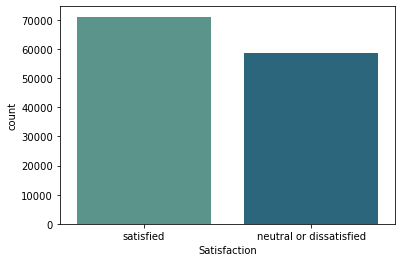

In [11]:
sns.countplot(satis['Satisfaction'], palette = 'crest')
plt.show()

The label data is balanced enough with 54,73% for satisfied and 45,27% for neutral/dissatisfied passengers.

### __DATA CLEANING__

Lets check correlation, but first i just wanna encode Satisfaction column with numerical.

In [12]:
satis_cor = satis.copy()
satis_cor['Satisfaction'] = satis_cor['Satisfaction'].apply(lambda x : 1 if x == 'satisfied' else 0)
satis_cor.head()

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


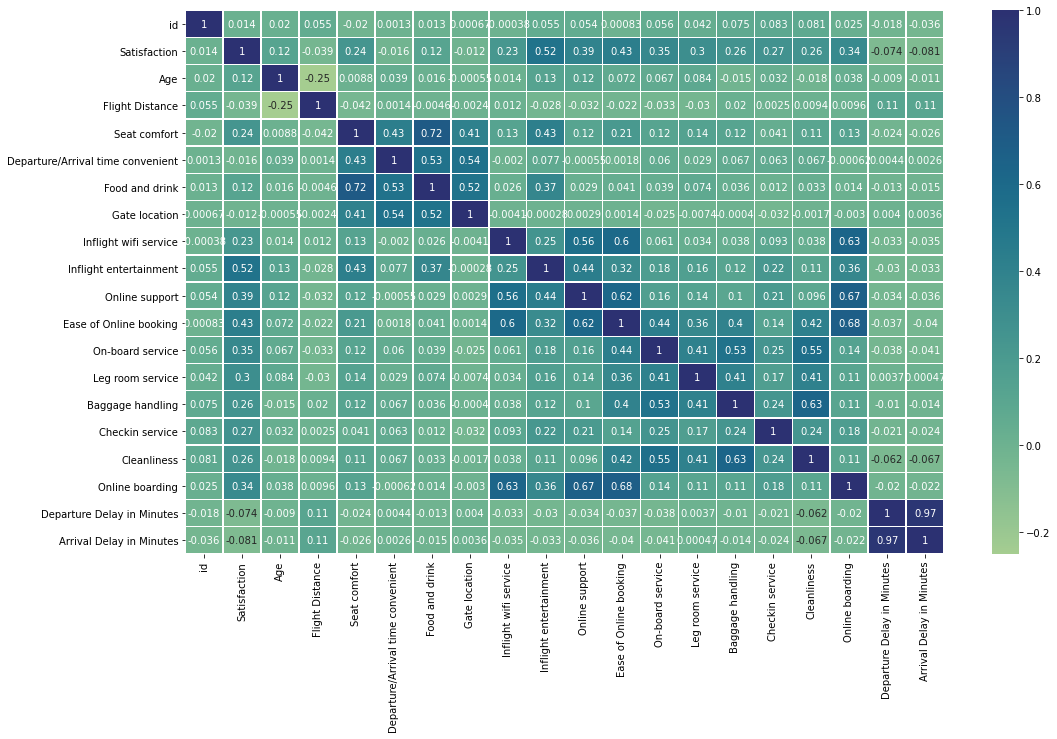

In [13]:
plt.figure(figsize=(17,10))

sns.heatmap(satis_cor.corr(), annot=True, cmap = 'crest', linewidths = .5)
plt.show()

In [14]:
satis_cor.corr(method = 'spearman')['Satisfaction'].sort_values(ascending=False).to_frame()

,Satisfaction
Satisfaction,1.000000
Inflight entertainment,0.577700
Ease of Online booking,0.429340
Online support,0.402324
On-board service,0.357099
Online boarding,0.333201
Leg room service,0.308221
Baggage handling,0.287126
Cleanliness,0.283907
Seat comfort,0.260671


As we know, some variables are quite correlated to satisfaction aspect, especially the columns of answers about satisfaction level in survey because they are ordinal value (14 columns), except Gate Location. 
<br> However, the most notable:
- The lowest correlation with Satisfaction (< 0.01 ) are Flight Distance (-0.04), Departure/Arrival time convenient (-0.014), Gate location (-0.012), Departure delay in Minutes (-0,072) and Arrival Delay in Minutes (-0,102)  
- The highest correlation (0.97) between "Delay in Departures in Minutes" and "Delay in Arrival in Minutes" 
<br> Logically, if the plane departs later than expected, the plane must also arrive later. 

<br> Considering about this:
I will keep these column : 
- Departure/Arrival time convenient and Gate location : because these columns are answer about satisfaction level.  
- Departure delay in Minutes and Arrival Delay in Minutes : because from basic knowledge its important aspect because it affects the level of passenger satisfaction and i will do PCA later to get best one. 

I will drop this column, but i have to recheck about outliers first : Flight distance. 

> __OUTLIERS__

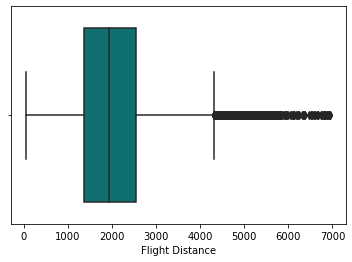

In [15]:
sns.boxplot(x = 'Flight Distance', data = satis, color = 'teal')
plt.show()

In [16]:
print('Nunique of Flight Distance : ', satis['Flight Distance'].nunique())

Nunique of Flight Distance :  5398


So, i will drop this columns because it has low correlation, many outliers, and its not important based on basic knowledge 'How far a journey when the service and facilities is good, passenger will satisfied'.

> __DROP COLUMN__

__Drop Column Schema + reason behind it:__
- ID : don't seem contain any important information for our purpose
- Flight Distance : low correlation, many outliers, and its not important based on basic knowledge

In [17]:
satis = satis.drop(['id', 'Flight Distance'], axis = 1)
satis

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


> __MISSING VALUE__

Let's look at Arrival Delay in Minutes column because there are several missing values.

In [18]:
satis['Arrival Delay in Minutes'].isna().sum()

393

In [19]:
satis['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

But i will fillna with median in EDA notebook and impute with pipeline in Modelling Notebook.
This is avoid to data leakage.

### __FEATURE ENGINEERING__

The dataset contains 129880 observations. From the 22 columns we currently have, 14 seem to be representing responses of satisfaction level (scale of 0 to 5).  
These 14 columns will be very important, so next i decided to make a new column from these.

> __SATISFACTION POIN__

'Satisfaction Poin' column is sum of value satisfaction level from 14 columns that represented responses of satisfaction survey. This column is created to see the distribution of the total poin from satisfied and neutral/dissatisfied passenger.

In [20]:
satis['Satisfaction Poin'] = satis['Seat comfort'] + satis['Departure/Arrival time convenient'] + satis['Food and drink'] + \
                            satis['Gate location'] + satis['Inflight wifi service'] + satis['Inflight entertainment'] + \
                            satis['Online support'] + satis['Ease of Online booking'] + satis['On-board service'] + \
                            satis['Leg room service'] + satis['Baggage handling'] + satis['Checkin service'] + \
                            satis['Cleanliness'] + satis['Online boarding']
satis.tail(3)

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction Poin
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,38
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,33
129879,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0,50


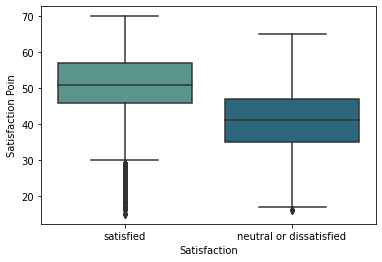

In [21]:
sns.boxplot(y = 'Satisfaction Poin', x = 'Satisfaction', data = satis, palette='crest')
plt.show()

<AxesSubplot:ylabel='Frequency'>

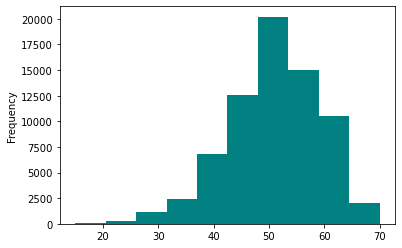

In [22]:
satis[satis['Satisfaction'] == 'satisfied']['Satisfaction Poin'].plot(kind = 'hist', color = 'teal')

<AxesSubplot:ylabel='Frequency'>

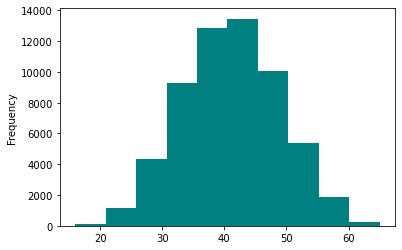

In [23]:
satis[satis['Satisfaction'] == 'neutral or dissatisfied']['Satisfaction Poin'].plot(kind = 'hist', color = 'teal')

__NORMALITY TEST__

In [24]:
satisfied = satis[satis['Satisfaction'] == 'satisfied']['Satisfaction Poin'].to_numpy()
dissatisfied = satis[satis['Satisfaction'] == 'neutral or dissatisfied']['Satisfaction Poin'].to_numpy()

In [25]:
#kolmogorov smirnov test 2sample

sstats, p = ks_2samp(satisfied, dissatisfied)
print(f"stats : {sstats}")
print('pvalue :', p)

alpha = 0.05

#hypotesis testing
if p < alpha:
    print('these two distributions are different')
else:
    print('these two distributions are same')

stats : 0.4559391269558231
pvalue : 0.0
these two distributions are different


In [26]:
#kolmogorov smirnov test 2sample

sstats, p = ks_2samp(dissatisfied, satisfied)
print(f"stats : {sstats}")
print('pvalue :', p)

alpha = 0.05

#hypotesis testing
if p < alpha:
    print('these two distributions are different')
else:
    print('these two distributions are same')

stats : 0.4559391269558231
pvalue : 0.0
these two distributions are different


> __TOTAL 0 POIN__

'Total 0 Poin' column is total '0' of satisfaction level on survey.
<br> This column to see how many passengers fill in the value 0 at the satisfaction level, so we can see the consistency of passengers in filling out the survey to minimize bias in the modeling process.

In [27]:
response = satis[['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]


rowlist = []
for i, j in response.iterrows():
    mylist = [j['Seat comfort'], j['Departure/Arrival time convenient'], j['Food and drink'], j['Gate location'], j['Inflight wifi service'], j['Inflight entertainment'], j['Online support'], j['Ease of Online booking'], j['On-board service'], j['Leg room service'], j['Baggage handling'], j['Checkin service'], j['Cleanliness'], j['Online boarding']]
    rowlist.append(mylist)

poin = []    
for i in rowlist:
    poin.append(i.count(0))

satis['Total_poin_0'] = (poin)
satis.tail(5)

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction Poin,Total_poin_0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,49,0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,30,0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,38,1
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,33,0
129879,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0,50,0


In [28]:
satis['Total_poin_0'].describe()

count    129880.000000
mean          0.161734
std           0.621173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Total_poin_0, dtype: float64

After we created that column, we can see that from the survey results is from all passengers that total of column which fill with  0 value are between 0 column (0%) - 4 columns (28%).
So we can see the consistency of passengers in filling out the survey is good enough.

So, i drop these columns again.

In [29]:
satis.drop(['Satisfaction Poin', 'Total_poin_0'], axis = 1, inplace = True)

In [30]:
satis

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


__Final check of the value in dataset__

In [31]:
satis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

Finally, the data has been cleaned, there is no some randomness and the missing value will execute in the next notebook.
<br> Next, the dataset will be save in new csv and next exploratory data analysis.

__Save to CSV File__

In [33]:
satis.to_csv('satis_clean.csv',index=False)

## __SCHEMA__

### __PREPROCESSING SCHEMA__

__Impute:__
- SimpleImputer with median: Arrival delay in minutes

__Encoding:__
- One hot : Gender, Customer Type, Type of Travel
- Ordinal : Class

__Scalling (depends on model)__
- Robust : Age, Departure Delay in Minutes, Arrival Delay in Minutes